Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+----+----+----+----+----+----+-----+---+-----+
|preg|plas|pres|skin|test|mass| pedi|age|class|
+----+----+----+----+----+----+-----+---+-----+
|   6| 148|  72|  35|   0|33.6|0.627| 50|    1|
|   1|  85|  66|  29|   0|26.6|0.351| 31|    0|
|   8| 183|  64|   0|   0|23.3|0.672| 32|    1|
|   1|  89|  66|  23|  94|28.1|0.167| 21|    0|
|   0| 137|  40|  35| 168|43.1|2.288| 33|    1|
+----+----+----+----+----+----+-----+---+-----+
only showing top 5 rows


Available columns in DataFrame:
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'cluster']


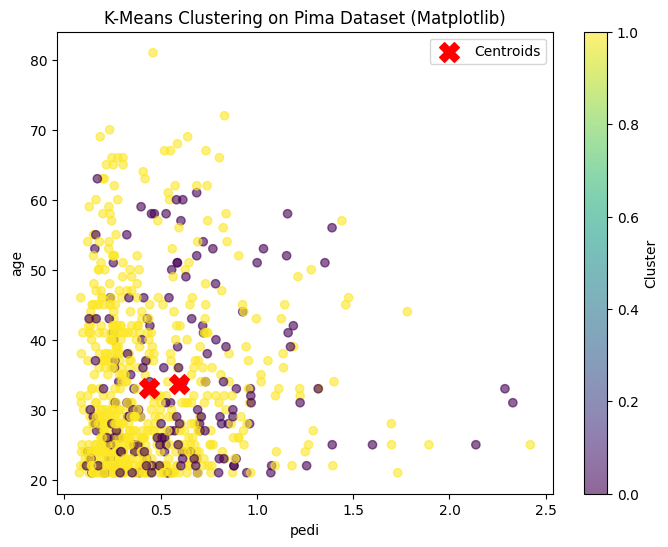

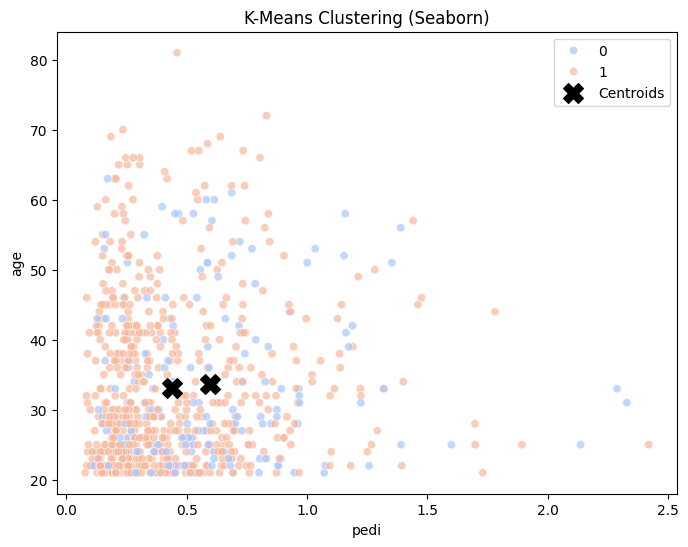

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from google.colab import drive
drive.mount('/content/drive')


# Initialize Spark Session
spark = SparkSession.builder.appName("pima").getOrCreate()

# Load Dataset
file_path = "/content/drive/My Drive/BDA/Dataset/pima.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)
df.show(5)

# Select features (excluding the last column)
feature_cols = df.columns[:-1]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_transformed = assembler.transform(df)

# Apply KMeans
kmeans = KMeans(k=2, seed=1, featuresCol="features", predictionCol="cluster")
model = kmeans.fit(df_transformed)
result = model.transform(df_transformed).select(*feature_cols, "cluster")

# Convert to Pandas DataFrame
df_pandas = result.toPandas()
df_pandas.columns = df_pandas.columns.str.strip()  # Strip any whitespace

# Print column names
print("\nAvailable columns in DataFrame:")
print(df_pandas.columns.tolist())

# Set columns manually based on printed output
x_col = 'pedi'
y_col = 'age'

# Get cluster centers
centroids = np.array(model.clusterCenters())

# Map feature names to their index in feature_cols
x_idx = feature_cols.index(x_col)
y_idx = feature_cols.index(y_col)

# Plot with Matplotlib
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pandas[x_col], df_pandas[y_col], c=df_pandas["cluster"], cmap="viridis", alpha=0.6)
plt.scatter(centroids[:, x_idx], centroids[:, y_idx],
            color="red", marker="X", s=200, label="Centroids")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title("K-Means Clustering on Pima Dataset (Matplotlib)")
plt.legend()
plt.colorbar(scatter, label="Cluster")
plt.show()

# Plot with Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pandas, x=x_col, y=y_col, hue="cluster", palette="coolwarm", alpha=0.7)
plt.scatter(centroids[:, x_idx], centroids[:, y_idx],
            color="black", marker="X", s=200, label="Centroids")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title("K-Means Clustering (Seaborn)")
plt.legend()
plt.show()

# Stop Spark Session
spark.stop()


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from google.colab import drive
drive.mount('/content/drive')


# Initialize Spark Session
spark = SparkSession.builder.appName("pima").getOrCreate()

# Load Dataset
file_path = "/content/drive/My Drive/BDA/Dataset/pima.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Row(preg=6, plas=148, pres=72, skin=35, test=0, mass=33.6, pedi=0.627, age=50, class=1)


In [18]:
# Select Features & Vectorize
feature_cols = df.columns[:-1]  # Excluding the Outcome column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_transformed = assembler.transform(df)

# Apply K-Means Clustering
kmeans = KMeans(k=2, seed=1, featuresCol="features", predictionCol="cluster")
model = kmeans.fit(df_transformed)

# Get cluster assignments
result = model.transform(df_transformed).select(*feature_cols, "cluster")
result.show(10)


+----+----+----+----+----+----+-----+---+-------+
|preg|plas|pres|skin|test|mass| pedi|age|cluster|
+----+----+----+----+----+----+-----+---+-------+
|   6| 148|  72|  35|   0|33.6|0.627| 50|      1|
|   1|  85|  66|  29|   0|26.6|0.351| 31|      1|
|   8| 183|  64|   0|   0|23.3|0.672| 32|      1|
|   1|  89|  66|  23|  94|28.1|0.167| 21|      1|
|   0| 137|  40|  35| 168|43.1|2.288| 33|      0|
|   5| 116|  74|   0|   0|25.6|0.201| 30|      1|
|   3|  78|  50|  32|  88|31.0|0.248| 26|      1|
|  10| 115|   0|   0|   0|35.3|0.134| 29|      1|
|   2| 197|  70|  45| 543|30.5|0.158| 53|      0|
|   8| 125|  96|   0|   0| 0.0|0.232| 54|      1|
+----+----+----+----+----+----+-----+---+-------+
only showing top 10 rows



In [19]:
# Convert to Pandas DataFrame
df_pandas = result.toPandas()

# Get cluster centers
centroids = np.array(model.clusterCenters())

# Stop Spark Session
spark.stop()


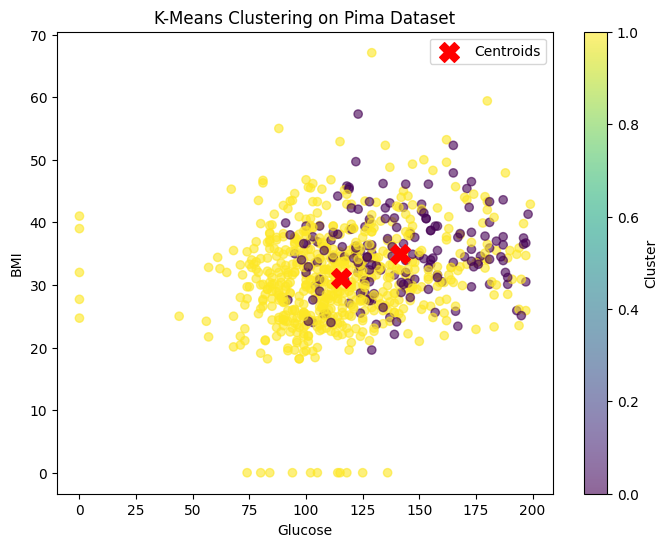

In [20]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pandas.iloc[:, 1], df_pandas.iloc[:, 5], c=df_pandas["cluster"], cmap="viridis", alpha=0.6)
plt.scatter(centroids[:, 1], centroids[:, 5], color="red", marker="X", s=200, label="Centroids")  # Centroids
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("K-Means Clustering on Pima Dataset")
plt.legend()
plt.colorbar(scatter, label="Cluster")
plt.show()


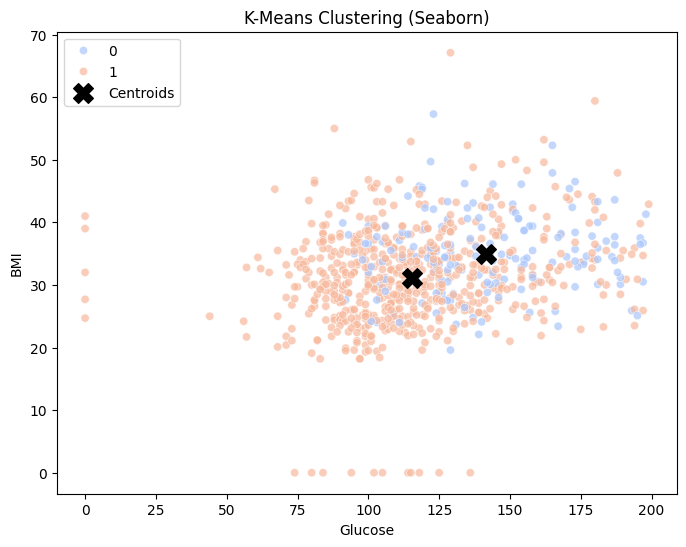

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pandas, x=df_pandas.iloc[:, 1], y=df_pandas.iloc[:, 5], hue="cluster", palette="coolwarm", alpha=0.7)
plt.scatter(centroids[:, 1], centroids[:, 5], color="black", marker="X", s=200, label="Centroids")  # Centroids
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("K-Means Clustering (Seaborn)")
plt.legend()
plt.show()
